In [ ]:
Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_dir = 'mnist-jpg/train'
test_data_dir = 'mnist-jpg/test'

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_batch_size=10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28,28),
    batch_size = train_batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle = True,
    classes=[str(i) for i in range(10)]
)

test_batch_size=2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28,28),
    batch_size = test_batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True,
    classes=[str(i) for i in range(10)]
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [3]:
x_train,y_train = next(train_generator)
x_test,y_test = next(test_generator)

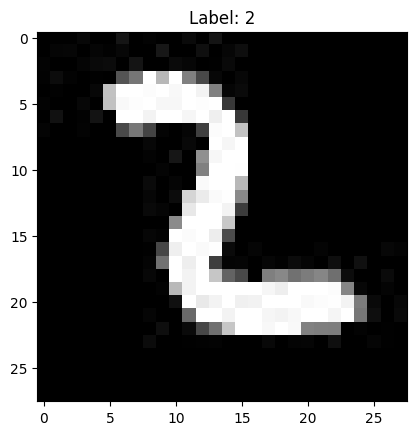

In [4]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

In [5]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\ashut\anaconda3\envs\deep_learn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8811 - loss: 0.3867 - val_accuracy: 0.9550 - val_loss: 0.1541
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9688 - loss: 0.1056 - val_accuracy: 0.9780 - val_loss: 0.0803
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9771 - loss: 0.0727 - val_accuracy: 0.9865 - val_loss: 0.0515
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9826 - loss: 0.0544 - val_accuracy: 0.9850 - val_loss: 0.0488
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9878 - loss: 0.0368 - val_accuracy: 0.9845 - val_loss: 0.0511


In [8]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test Accuracy",test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9845 - loss: 0.0511 
Test Accuracy 0.984499990940094


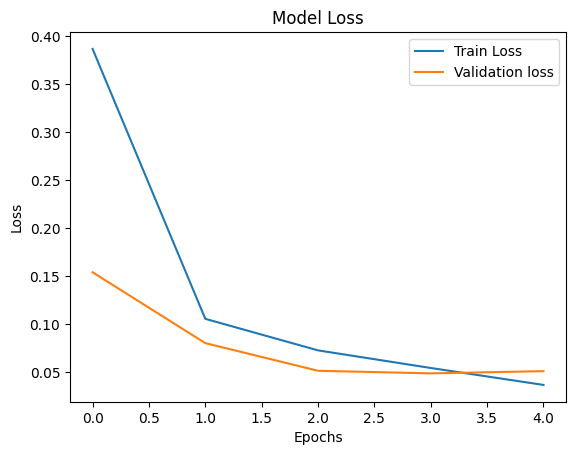

In [9]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions,axis=1)
actual_classes = np.argmax(y_test,axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


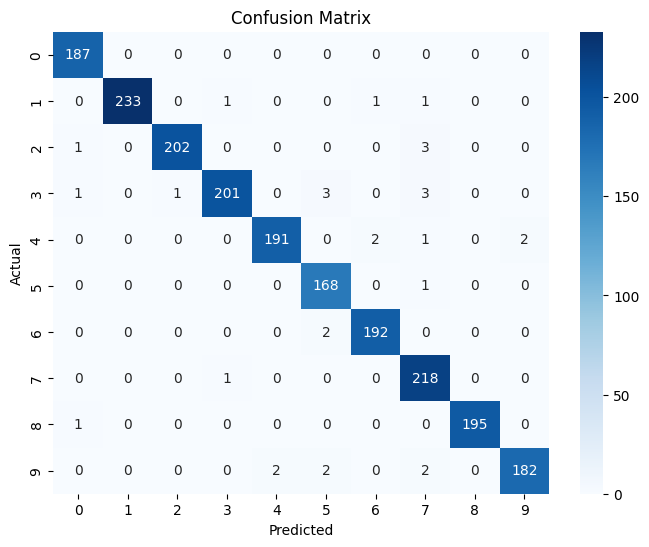

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual_classes, predicted_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
model.save('mnist_cnn_model.h5')